# Melbourne Property Price Prediction 

โปรเจคนี้ใช้ MelbourneHousingMarket dataset จาก https://www.kaggle.com/anthonypino/melbourne-housing-market
ในส่วนของการสร้างโมเดลจะใช้เทคนิคที่เรียกว่า Regression มาทำการสร้าง Machine Learning Model เพื่อทำนายราคาของอสังหาริมทรัพย์ในเมือง Melbourne
ประเทศออสเตรเลีย

### Data

ในส่วนของ dataset จะประกอบไปด้วยคอลัมน์ดังนี้

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method**: 
* **S** - property sold.    
* **SP** - property sold prior. 
* **PI** - property passed in.   
* **PN** - sold prior not disclosed.    
* **SN** - sold not disclosed.   
* **NB** - no bid.  
* **VB** - vendor bid.
* **W** - withdrawn prior to auction.    
* **SA** - sold after auction.   
* **SS** - sold after auction price not disclosed.    
* **N/A** - price or highest bid not available.

**Type**:
* **br** - bedroom(s).
* **h** - house,cottage,villa, semi,terrace.
* **u** - unit, duplex.
* **t** - townhouse.
* **dev site** - development site.
* **o res** - other residential.

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2** : Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanitory

**Longtitude**: Self explanitory

### Import Iibrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv') 

### Preview data

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [6]:
df.shape

(34857, 21)

### Feature Engineering

In [7]:
# Convert numeric variables to categorical
num_cats = ['Suburb','Address','Type','Method','SellerG','Postcode','CouncilArea','Regionname']  

for colname in num_cats:
    df[colname] = df[colname].astype('category')   

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  object  
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  category
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [8]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

#### Missing value

In [9]:
# Percentage of missing values
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

จะสังเกตได้ว่าคอลัมน์บางคอลัมน์มี Missing value มากกว่า 50% หากนำข้อมูลเหล่านั้นไปสร้างโมเดล ก็มีโอกาสจะทำให้โมเดลทำงานผิดพลาดสูง จึงควร drop ทิ้ง

In [10]:
df = df.drop(['BuildingArea','YearBuilt'], axis = 1) 

เริ่มต้นใช้ Intuition โดยคาดว่า Latitude , Longtitude และ Postcode ไม่น่าจะมีผลต่อราคา ควรทำการลบเพื่อลดขนาดของข้อมูล

In [11]:
df = df.drop(['Lattitude','Longtitude','Postcode'], axis = 1) 

เนื่องจากคอลัมน์ Rooms และ Bedroom2 เป็นข้อมูลเดียวกัน แต่มากจากคนละแหล่ง เราจึงจะมาเปรียบเทียบข้อมูลกัน

In [12]:
(df['Rooms'] - df['Bedroom2']).mean()

0.016253753753753753

จะเห็นได้ว่าคอลัมน์ Rooms และ Bedroom2 แตกต่างกันน้อยมากอย่างไม่มีนัยสำคัญ เพื่อความสะดวกจึงจะทำการลบคอลัมน์ Bedroom 2 ทิ้ง

In [13]:
df = df.drop(['Bedroom2'], axis = 1) 

ตอนนี้เราจะเหลือ Missing value อยู่หลักๆคือ
- Price      21.8%
- Bathroom   23.6%
- Car        25%
- Landsize   33.9%

และจะแทน Missing Value เหล่านี้ด้วยฐานนิยมของแต่ละคอลัมน์

In [14]:
# df['Price'].fillna(df['Price'].mode()[0], inplace = True)
# df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace = True)
# df['Car'].fillna(df['Car'].mode()[0], inplace = True)
# df['Landsize'].fillna(df['Landsize'].mode()[0], inplace = True)

In [15]:
df['Price'].mode()[0]

600000.0

In [16]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Bathroom          8226
Car               8728
Landsize         11810
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

ตอนนี้จำนวน Missing Value ที่เหลือมีเพียงเลขหลักเดียว เราจะทำการ drop แถวของข้อมูลเหล่านี้ทิ้ง

In [17]:
df=df.dropna()

#### Handling Outlier

In [18]:
Numeric_list = ['Rooms','Price','Distance','Bathroom','Car','Landsize','Propertycount']

In [19]:
out=[]

#IQR_Outliers_Function
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    ##print("Outliers:",out)
    return out

#Remove_Outliers_Function
def remove_outliers(outlier_list,column_name):
    outlier_list = list(dict.fromkeys(outlier_list))
    for i in outlier_list:
        df.drop(df[df[column_name] == i].index, inplace = True)

#Loop_Remove_Function
def loop_remove_outliers(list):
    for i in list:
        outliers_val = iqr_outliers(df[i])
        remove_outliers(outliers_val,i)

In [20]:
loop_remove_outliers(Numeric_list)

In [21]:
df.shape

(14160, 15)

### Exploratory Data Analysis

### Correlation

### Linear Regression

In [22]:
df.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'Propertycount'],
      dtype='object')

In [23]:
X = df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize','Propertycount']]
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [24]:
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 269818.2679408486
MSE: 115714184968.39531
RMSE: 340167.8776257325


In [27]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.39353001601374304


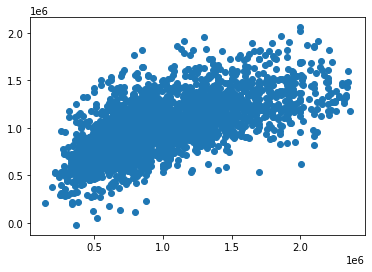

In [32]:
plt.scatter(y_test,y_pred)

c:\users\plugp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

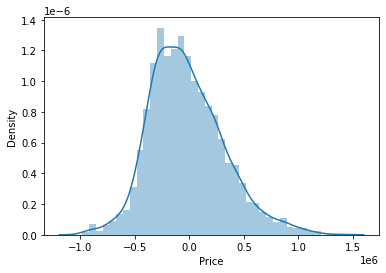

In [29]:
sns.distplot((y_test - y_pred))

In [30]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,183083.810951
Distance,-44696.027419
Bathroom,127505.280459
Car,28521.990524
Landsize,519.379451
Propertycount,1.538712


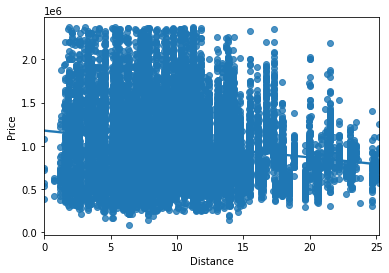